In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
column_names = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
                'Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin',
                'Body mass index','Diabetes pedigree function','Age']
column_names.append('Classification')

data = pd.read_csv('pima-indians-diabetes.data', names = column_names)
data

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Classification
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure                                                      int64
Triceps skin fold thickness                                                   int64
2-Hour serum insulin                                                          int64
Body mass index                                                             float64
Diabetes pedigree function                                                  float64
Age                                                                           int64
Classification                                                                int64
dtype: object

In [4]:
data['Classification'].unique()

array([1, 0])

In [5]:
X = data.drop('Classification', axis=1)
y = data['Classification']

In [6]:
X = np.array(X)
y = np.array(y)

# 10-Fold

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

num = 1
n = 0
precision = []
recall = []
accuracy = []
f1 = []

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[train_idx],
                                                        y[train_idx],
                                                        test_size=0.25,
                                                        random_state=42)

    print(" ")
    print(f"Fold {num}:")
    print("_____________________________________________________________________________________________")
    
    clf = DecisionTreeClassifier(random_state = 42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test, y_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average=None)
    rec = metrics.recall_score(y_test, y_pred,average=None)
    score = metrics.f1_score(y_test, y_pred,average=None)
    
    precision.append(prec)
    recall.append(rec)
    accuracy.append(acc)
    f1.append(score)
    
    print("Accuracy:",acc)
    print("y_true:", y_score)
    
    
    print(metrics.classification_report(y_test, y_pred))
    
    num = num+1
train_index = train_idx
test_index = test_idx

 
Fold 1:
_____________________________________________________________________________________________
Accuracy: 0.7456647398843931
y_true: 0.7456647398843931
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       109
           1       0.66      0.64      0.65        64

    accuracy                           0.75       173
   macro avg       0.73      0.72      0.73       173
weighted avg       0.74      0.75      0.74       173

 
Fold 2:
_____________________________________________________________________________________________
Accuracy: 0.7225433526011561
y_true: 0.7225433526011561
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       109
           1       0.63      0.61      0.62        64

    accuracy                           0.72       173
   macro avg       0.70      0.70      0.70       173
weighted avg       0.72      0.72      0.72       173

 
Fold 3:
________________

In [8]:
avg_precision = np.sum(precision, axis=0)/len(precision)
avg_accuracy = np.sum(accuracy, axis=0)/len(accuracy)
avg_recall = np.sum(recall, axis=0)/len(recall)
avg_f1 = np.sum(f1, axis=0)/len(f1)

In [9]:
from statistics import mean
print(f'Average accuracy of 10-folds: {round(avg_accuracy,2)}')
print(f'Average precision of 10-folds: {round(mean(avg_precision), 2)}')
print(f'Average recall of 10-folds: {round(mean(avg_recall), 2)}')
print(f'Average F1 score of 10-folds: {round(mean(avg_f1), 2)}')

Average accuracy of 10-folds: 0.72
Average precision of 10-folds: 0.68
Average recall of 10-folds: 0.68
Average F1 score of 10-folds: 0.68


# Values of final fold values displayed

In [10]:
X_train_final = X[train_index]
y_train_final = y[train_index]
X_test_final = X[test_index]
y_test_final = y[test_index]

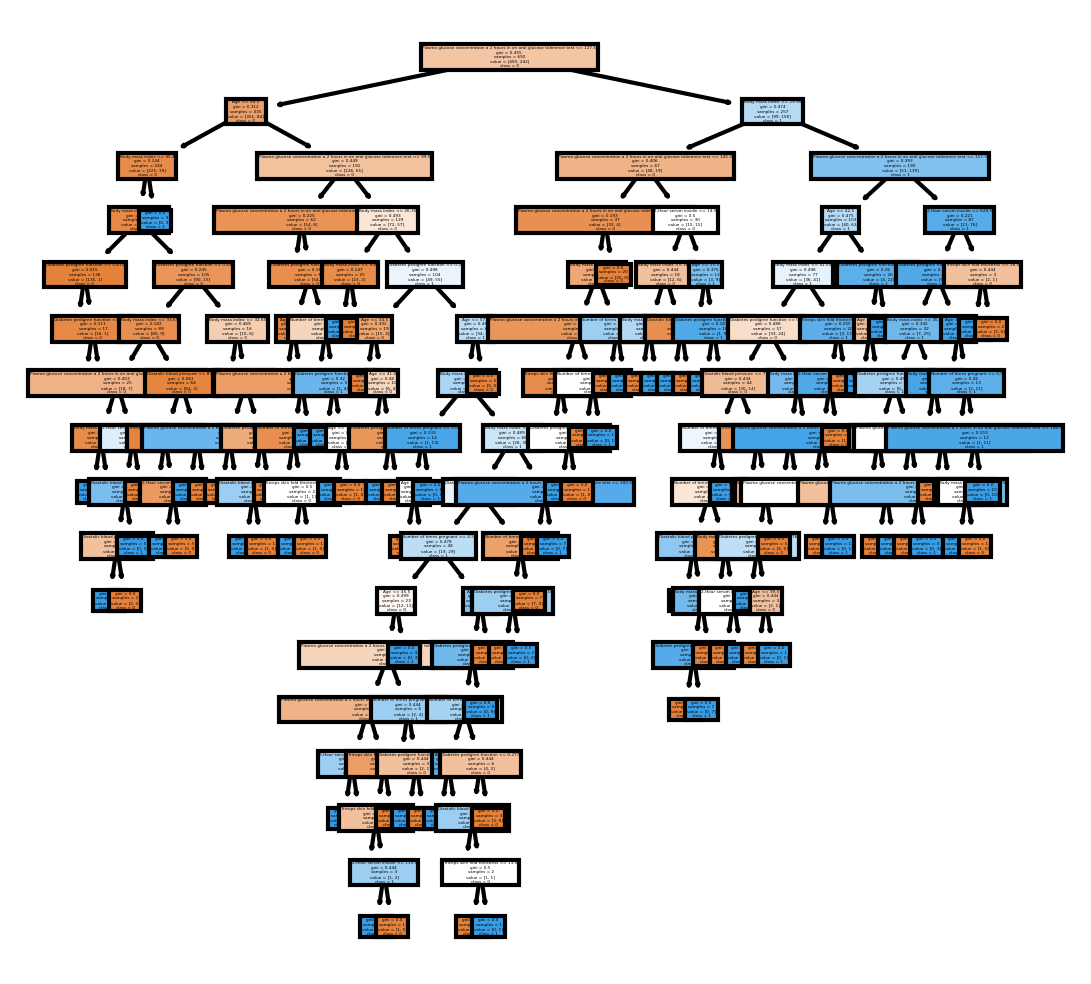

In [11]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_final, y_train_final)
y_pred_final = clf.predict(X_test_final)

fn = column_names
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

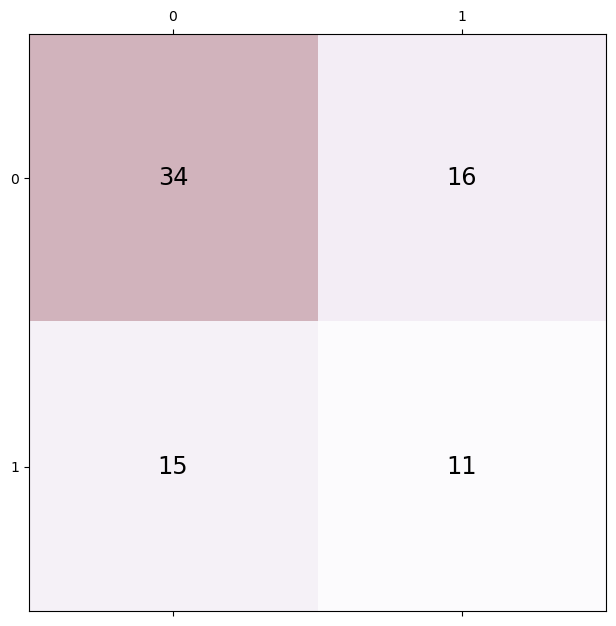

In [12]:
conf_matrix = metrics.confusion_matrix(y_test_final, y_pred_final)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap= 'PuRd', alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')